In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import fashion_mnist

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Loading the Fasio_MNIST dataset in Keras

In [17]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

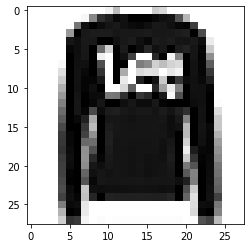

In [32]:
sample = 1
image = test_images[sample]
# plot the sample
fig = plt.figure
# plt.imshow(image, cmap='gray')
plt.imshow(image, cmap='gray_r')
plt.show()

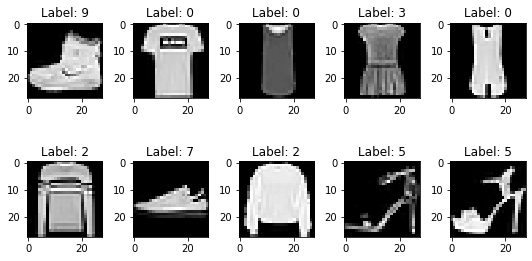

In [30]:
num = 10
images = train_images[:num]
labels = train_labels[:num]

num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [6]:
print(len(train_images))
print(len(train_labels))

60000
60000


In [7]:
print(len(test_images))
print(len(test_labels))

10000
10000


In [8]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
print(test_labels)
print(np.unique(test_labels))

[9 2 1 ... 8 1 5]
[0 1 2 3 4 5 6 7 8 9]


# The network Architechture

In [10]:
from keras import models
from keras import layers
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

Using TensorFlow backend.


# The compilation step

In [11]:
network.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

# Preparing the image data

In [12]:
train_images = train_images.reshape((60000, 28 * 28))   #changed from 3d to 2d
train_images = train_images.astype('float32') / 255    #Normalization scale in bt 0-1
test_images = test_images.reshape((10000, 28 * 28))  #changed from 3d to 2d
test_images = test_images.astype('float32') / 255    # Normalization scale in bt 0-1

# Preparing the labels

In [13]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Train model

In [14]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)


Epoch 1/5
60000/60000 [==============================] - 4s 72us/step - loss: 0.5525 - accuracy: 0.8039
Epoch 2/5
60000/60000 [==============================] - 5s 81us/step - loss: 0.3791 - accuracy: 0.8615
Epoch 3/5
60000/60000 [==============================] - 4s 70us/step - loss: 0.3350 - accuracy: 0.8777
Epoch 4/5
60000/60000 [==============================] - 4s 69us/step - loss: 0.3088 - accuracy: 0.8853
Epoch 5/5
60000/60000 [==============================] - 4s 68us/step - loss: 0.2906 - accuracy: 0.8931


In [15]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

10000/10000 [==============================] - 1s 51us/step
test_acc: 0.8784000277519226
